In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

**Instructions**

- You may use any Python standard library module and the 3rd party modules that are imported for you
- Do not use any 3rd party module that has not been imported for you

**1**. (20 points) Functional programming, string processing and basic numeric literacy

- Load the standard numpy binary file `nucelotides.npy` into a `numpy` array `xs`. State the number of rows `m` and number of columns `n`. Convert to a list of `m` strings of length `n` each by combining individual nucleotide letters (5 points)
- Find the 10 most common overlapping sequence of length 3 among the `m` strings using shifting windows (10 points)
- Find the longest consecutive sequence of a single nucleotide, and report the string (row number) and (start, end) positions within that string (10 points)

- Load the standard numpy binary file `nucelotides.npy` into a `numpy` array `xs`. State the number of rows `m` and number of columns `n`. Convert to a list of `m` strings of length `n` each by combining individual nucleotide letters (5 points)

In [8]:
xs = np.load('nucleotides.npy')

In [11]:
xs.shape

(100, 80)

In [10]:
ss = [''.join(x) for x in xs]

- Find the 10 most common overlapping sequence of length 3 among the `m` strings using shifting windows (10 points)

In [19]:
from collections import Counter
from functools import reduce

In [27]:
c = Counter(reduce(lambda a, b: a + list(b), 
                   (zip(s, s[1:], s[2:]) for s in ss), []))

In [28]:
[(''.join(k), v) for k, v in c.most_common(10)]

[('AAA', 464),
 ('ATA', 386),
 ('TAA', 376),
 ('AAT', 375),
 ('TTA', 314),
 ('ATT', 307),
 ('TAT', 307),
 ('AGA', 256),
 ('AAG', 235),
 ('GAA', 226)]

- Find the longest consecutive sequence of a single nucleotide, and report the string (row number) and (start, end) positions within that string. If there is more than one such maximal sequence, you can report any of them. (10 points)

In [ ]:
import re

In [32]:
pat = re.compile('(A+|C+|T+|G+)')
max([(i, max(pat.findall(s), key=len))
     for i, s in enumerate(ss)], key=lambda x: len(x[1]))

**2**. (20 points) Data manipulation and basic plotting

- Read `TB_burden_age_sex_2019-11-21.csv` into a Pandas DataFrame. Find the sum of TB incidence for a **maximal non-overlapping partition** of age groups using only rows where the value is in (`m`, `f`) across all countries in Europe (EUR). Show the results sorted by age group in ascending order, keeping only `age_group`, `best`, `lo` and `hi` (20 points)
- Make a bar chart of the table showing with `best` as the height and `lo`, `hi` as error bars for each age group using `matplotlib` (5 points)
    - The region a country belongs to can be inferred from the file `TB_notifications_2019-11-21.csv` in the column `g_whoregion`
    - By **maximal non-overlapping partition**, I mean there should be as many age-groups as possible but none of the age-groups should overlap

The final figure should look similar to this
![img](tb.png)

In [45]:
df1 = pd.read_csv('TB_burden_age_sex_2019-11-21.csv')

In [60]:
df1.head(3)

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi,g_whoregion
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0,EMR
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0,EMR
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0,EMR


In [47]:
df2 = pd.read_csv('TB_notifications_2019-11-21.csv')

In [48]:
df2.head(3)

,country,iso2,iso3,iso_numeric,g_whoregion,year,new_sp,new_sn,new_su,new_ep,...,hivtest_pos,hiv_cpt,hiv_art,hiv_tbscr,hiv_reg,hiv_ipt,hiv_reg_new,hiv_ipt_reg_all,hiv_tbdetect,hiv_reg_new2
0,Afghanistan,AF,AFG,4,EMR,1980,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,4,EMR,1981,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,4,EMR,1982,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
coutry_region  = df2[['country', 'g_whoregion']].drop_duplicates()

In [54]:
df1 = df1.merge(coutry_region, on='country')

In [66]:
df_age = df1[(df1.g_whoregion=='EUR') & (df1.sex.isin(['m', 'f']))].groupby(['age_group']).sum()

In [71]:
df_age = df_age.drop(['all', '0-14', '15plus'])

In [81]:
df_age['start_age'] = df_age.index.str.split('-').str[0].str.replace('plus', '').astype('int')

In [95]:
df_age = df_age.sort_values('start_age')[['best', 'lo', 'hi']]

In [96]:
df_age

,best,lo,hi
age_group,,,
0-4,4475,869.0,8528.0
5-14,7517,1245.0,14800.0
15-24,27151,6708.0,49852.0
25-34,52071,8694.0,101331.0
35-44,57724,8161.0,113851.0
45-54,43089,7942.0,83688.0
55-64,34823,7216.0,65644.0
65plus,31553,8683.0,56641.0


In [105]:
df_age[['lo', 'hi']].values

array([[   869.,   8528.],
       [  1245.,  14800.],
       [  6708.,  49852.],
       [  8694., 101331.],
       [  8161., 113851.],
       [  7942.,  83688.],
       [  7216.,  65644.],
       [  8683.,  56641.]])

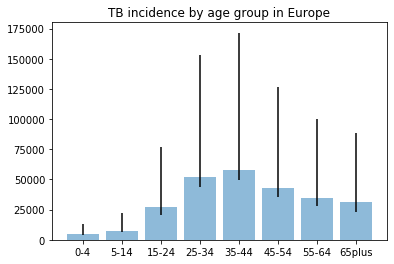

In [110]:
plt.bar(x=df_age.index, height=df_age.best, 
        yerr=df_age[['lo', 'hi']].values.T, alpha=0.5)
plt.title('TB incidence by age group in Europe')

**3**. (20 points) Graphs

We have a data set consisting of people who want to travel from country A to country B, and we know the distances from country A and B. The data set is `'travel.csv'`.

- Find the largest set of countries where travelers could pass a message to each other either directly or via a chain of other travelers, assuming that travelers can freely go from `src` to `dst` in either direction (15 points)
- Show the shortest distance between each country in this set as a DataFrame with countries sorted alphabetically (10 points)

In [487]:
data = pd.read_csv('travel.csv')

In [488]:
data.head()

,traveler,src,dst,distance
0,Daniel Gonzalez,Heard Island and McDonald Islands,Saint Helena,15446
1,Thomas Brown,Nauru,Mali,19460
2,Drew Taylor,Estonia,Thailand,2757
3,Amber Sampson,Chile,Venezuela,1170
4,Sheryl Rodriguez,Korea,Saint Lucia,19041


In [489]:
import networkx as nx

In [490]:
G = nx.Graph()

In [491]:
G.add_weighted_edges_from(data.values[:, 1:].tolist())

In [492]:
countries = max(nx.connected_components(G), key=len)

In [493]:
countries

{'Australia',
 'Belgium',
 'Cayman Islands',
 'Czech Republic',
 'Ethiopia',
 'Fiji',
 'France',
 'Haiti',
 'India',
 "Lao People's Democratic Republic",
 'Poland',
 'Saint Barthelemy',
 'Saint Pierre and Miquelon',
 'San Marino',
 'Saudi Arabia',
 'Seychelles',
 'Uganda',
 'Wallis and Futuna'}

In [494]:
G1 = nx.subgraph(G, countries)

In [495]:
distances = dict(nx.all_pairs_dijkstra_path_length(G1))

In [496]:
countries = sorted(countries)

In [497]:
matrix = np.zeros((len(countries), len(countries)))
for i, country in enumerate(countries):
    d = distances[country]
    for j, country in enumerate(countries):
        matrix[i, j] = d[country]
pairwise = pd.DataFrame(matrix, index=countries, columns=countries)

In [498]:
pairwise.astype('int')

,Australia,Belgium,Cayman Islands,Czech Republic,Ethiopia,Fiji,France,Haiti,India,Lao People's Democratic Republic,Poland,Saint Barthelemy,Saint Pierre and Miquelon,San Marino,Saudi Arabia,Seychelles,Uganda,Wallis and Futuna
Australia,0,21320,18110,55422,13287,18759,25701,72398,25448,50801,36527,61987,54051,84584,72094,41427,20377,48869
Belgium,21320,0,3210,40522,8033,13505,10801,57498,20194,35901,21627,47087,39151,69684,57194,26527,15123,33969
Cayman Islands,18110,3210,0,37312,4823,10295,7591,54288,16984,32691,18417,43877,35941,66474,53984,23317,11913,30759
Czech Republic,55422,40522,37312,0,42135,47607,29721,16976,54296,8485,18895,19671,11735,29162,29778,23795,49225,6553
Ethiopia,13287,8033,4823,42135,0,5472,12414,59111,12161,37514,23240,48700,40764,71297,58807,28140,7090,35582
Fiji,18759,13505,10295,47607,5472,0,17886,64583,17633,42986,28712,54172,46236,76769,64279,33612,12562,41054
France,25701,10801,7591,29721,12414,17886,0,46697,24575,25100,10826,36286,28350,58883,46393,15726,19504,23168
Haiti,72398,57498,54288,16976,59111,64583,46697,0,71272,25461,35871,36647,28711,12186,46754,40771,66201,23529
India,25448,20194,16984,54296,12161,17633,24575,71272,0,49675,35401,60861,52925,83458,70968,40301,5071,47743
Lao People's Democratic Republic,50801,35901,32691,8485,37514,42986,25100,25461,49675,0,14274,11186,3250,37647,21293,19174,44604,1932


**4**. (20 points)

Geographical coordinates are given as a (latitude, longitude) pair $(\phi, \lambda)$, and hence the difference in latitude and longitude are

$$
\Delta \phi = \phi_2 - \phi_1 \\
\Delta \lambda = \lambda_2 - \lambda_1
$$

For the problem, latitude and longitude are given in degrees. You need to convert to radians by multiplying with the factor $\pi/180$ or use the `radians` function in numpy. Once you have converted to radians, you can calculate an approximate distance using the formula

$$
a = \sin^2 (\Delta \phi/2) + \cos \phi_1 \cos \phi_2 \sin^2 (\Delta \lambda) \\
d = 2 \arcsin(\sqrt{a})
$$

where $%R = 6371$ is the Earth's radius in km.

- Using this formula and the lookup information provided in the DataFrame `meta`, calculate the distance from Durham, North Carolina to every other city in the United States (not including itself). Show rows for the 5 cities in the DataFrame closest to Durham.

In [442]:
meta = pd.read_csv('worldcities.csv')

In [459]:
usa = meta.loc[meta.country == 'United States',
               ['city', 'country', 'lat', 'lng', 'population']]

In [424]:
def dist(lat1, lon1, lat2, lon2):
    """Distace formula in km."""
    
    phi_1 = lat1 * np.pi/180 
    lam_1 = lon1 * np.pi/180
    phi_2 = lat2 * np.pi/180
    lam_2 = lon2 * np.pi/180
    d_phi = phi_2 - phi_1
    d_lam = lam_2 - lam_1
    R = 6371
    a = np.sin(d_phi/2)**2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(d_lam/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

In [437]:
dist(usa.lat[:3], usa.lng[:3], durham.lat.values[0], durham.lng.values[0])

8095    3756.742068
8096    3810.712261
8097    3760.089904
dtype: float64

In [460]:
durham = usa[usa.city == 'Durham']
usa = usa.loc[usa.city != 'Durham']
usa['distance_from_durham'] = dist(usa.lat, usa.lng, durham.lat.values[0], durham.lng.values[0])
usa.sort_values('distance_from_durham').head(10)

,city,country,lat,lng,population,distance_from_durham
9460,Chapel Hill,United States,35.9269,-79.0390,59862.0,13.519910
9508,Morrisville,United States,35.8366,-78.8349,26461.0,17.075897
9530,Carrboro,United States,35.9259,-79.0876,21544.0,17.601099
9504,Hillsborough,United States,36.0680,-79.0993,7231.0,20.145255
9437,Butner,United States,36.1285,-78.7502,17394.0,21.544843
9478,Cary,United States,35.7814,-78.8167,165904.0,23.401671
9522,Apex,United States,35.7248,-78.8659,50451.0,28.547594
9439,Raleigh,United States,35.8323,-78.6439,1018336.0,28.568368
9395,Wake Forest,United States,35.9631,-78.5143,42269.0,35.091129
9455,Mebane,United States,36.0879,-79.2751,14973.0,35.497354


**5**. (20 points)

Create a Spark DataFrame from the `meta` pandas DataFrame. Find the city in each country with the highest population. Show a table with 3 columns (country, city, population) for the first 5 rows sorted by country name.

- Register the Spark DataFrame as a Spark SQL table. Then find the solution using an SQL query

Hints:

- You should remove any rwow with NaN in the population columns
- I suggest using a common table expression to create two tables, then joining them to get the required information

In [311]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [295]:
spark = SparkSession.builder.getOrCreate()

In [328]:
info = spark.createDataFrame(meta)
info.registerTempTable("cities")

In [461]:
info.show(5)

+-----------+-------+-------+-------+----------+
|       city|country|    lat|    lng|population|
+-----------+-------+-------+-------+----------+
|  Malishevë| Kosovo|42.4822|20.7458|       NaN|
|    Prizren| Kosovo|42.2139|20.7397|       NaN|
|Zubin Potok| Kosovo|42.9144|20.6897|       NaN|
|   Kamenicë| Kosovo|42.5781|21.5803|       NaN|
|       Viti| Kosovo|42.3214|21.3583|       NaN|
+-----------+-------+-------+-------+----------+
only showing top 5 rows



In [382]:
spark.sql("""
WITH 
    t1 AS (
    SELECT country, city, population FROM cities
    ),
    t2 AS (
    SELECT country, MAX(population) as population
    FROM cities
    WHERE population <> 'NaN'
    GROUP BY country
    )
SELECT t1.country, t1.city, t1.population 
FROM t2
JOIN t1
ON t1.country = t2.country AND t1.population = t2.population
ORDER BY country
""").show(5)

+--------------+---------+----------+
|       country|     city|population|
+--------------+---------+----------+
|   Afghanistan|    Kabul| 3277000.0|
|       Albania|   Tirana|  895350.0|
|       Algeria|  Algiers| 3354000.0|
|American Samoa|Pago Pago|   12576.0|
|       Andorra|  Andorra|   53998.0|
+--------------+---------+----------+
only showing top 5 rows

